In [1]:
import pandas as pd

### Load Iris Classification dataset

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['Iris_type'])

In [3]:
#inspect the dataframes
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y.head()

,Iris_type
0,0
1,0
2,0
3,0
4,0


In [5]:
#Produce feature stats, such as min, max, mean etc
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Check if dataset is balanced
y.value_counts()

Iris_type
2            50
1            50
0            50
dtype: int64

### Data Modelling

In [7]:
from sklearn.model_selection import train_test_split

#split data into training and test sets

#test set size
data_size_for_testing = 0.3

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=data_size_for_testing, 
                                                    random_state=42,  shuffle=True,
                                                    stratify=y)


In [8]:
#Features are standardised to improve model training and target labels transformed to integer classes.  
from sklearn.preprocessing import StandardScaler, LabelEncoder
standscaler = StandardScaler()

#We standardise the training set and use the standardised object to transform the test set to ensure consistency between training and test sets
standscaler.fit(x_train)

#training
train_features = pd.DataFrame(standscaler.transform(x_train), columns=x_train.columns)
x_train = train_features
y_train = y_train.reset_index().drop("index", axis=1)

#test
test_features = pd.DataFrame(standscaler.transform(x_test), columns=x_test.columns)
x_test= test_features
y_test = y_test.reset_index().drop("index", axis=1)





### Training Stage

In [39]:
#train a random forest model
from sklearn.ensemble import RandomForestClassifier
model_clf = RandomForestClassifier(criterion='gini')
model_clf.fit(x_train,y_train.values.ravel())


RandomForestClassifier()

### Evaluate Model Performance

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [41]:
y_val = model_clf.predict(x_test)

In [42]:
#Performance report
print(classification_report(y_test,y_val))
print(confusion_matrix(y_test,y_val))
print(accuracy_score(y_test,y_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.87        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
0.9111111111111111


### Permutation Importance

In [43]:
import copy
import numpy as np
def PI_calculate(model, data, criterion):
    PI_matrix = []
    original_pred = model.predict(data[0])
    original_error = criterion(data[1],original_pred)
    for feature in range(data[0].shape[1]):
        perbutated_data= copy.deepcopy(data[0])
        np.random.shuffle(perbutated_data.iloc[ : , feature])
        perbutated_pred = model.predict(perbutated_data)
        perbutated_error = criterion(data[1], perbutated_pred)
        PI_matrix.append((original_error - perbutated_error))
    return pd.DataFrame(PI_matrix, index=data[0].columns, columns=['Features']).transpose()


In [44]:
from sklearn.metrics import accuracy_score
PI = PI_calculate(model_clf,[x_test,y_test],accuracy_score)

### Plot feature importance 

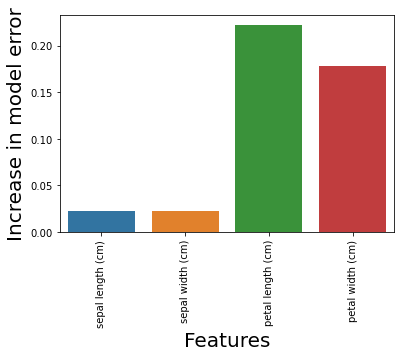

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.barplot(x = PI.columns,y=PI.values.flatten())
p.set_xlabel("Features", fontsize = 20)
p.set_ylabel("Increase in model error", fontsize = 20)
p.set_xticklabels(p.get_xticklabels(),rotation = 90)
plt.plot()
plt.savefig('irisPI.png',bbox_inches = "tight")